In [1]:
import networkx as nx

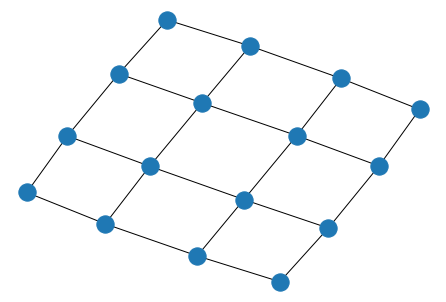

In [2]:
# Create a graph and visualize it
G = nx.grid_2d_graph(4,4)

import matplotlib.pyplot as plt
nx.draw(G)

In [3]:
import gurobipy as gp
from gurobipy import GRB

In [4]:
# Create model object
m = gp.Model()

# Create variable for each node
x = m.addVars( G.nodes, vtype=GRB.BINARY )

# Objective function: minimize number of nodes
m.setObjective( gp.quicksum( x[i] for i in G.nodes ), GRB.MINIMIZE )

# Add constraint for each node
m.addConstrs( x[i] + gp.quicksum( x[j] for j in G.neighbors(i) ) >= 1 for i in G.nodes )

# Solve
m.optimize()

Academic license - for non-commercial use only - expires 2021-07-26
Using license file C:\Users\Austin\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 16 rows, 16 columns and 64 nonzeros
Model fingerprint: 0x699f8de2
Variable types: 0 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 6.0000000
Presolve time: 0.01s
Presolved: 16 rows, 16 columns, 64 nonzeros
Variable types: 0 continuous, 16 integer (16 binary)

Root relaxation: objective 4.000000e+00, 11 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       4.0000000    4.00000  0.00%     -

In [5]:
print("Objective:",m.objVal)

selected_nodes = [ i for i in G.nodes if x[i].x > 0.5 ]

Objective: 4.0


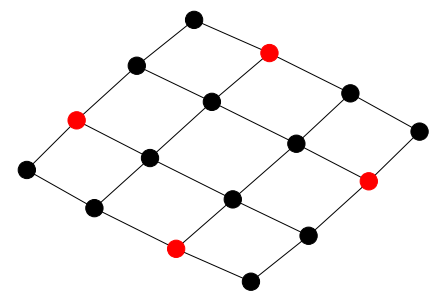

In [6]:
# Visualize the solution
node_colors = [ "red" if i in selected_nodes else "black" for i in G.nodes ]

nx.draw( G, node_color=node_colors )